In [68]:
include("src/graph_sample.jl")

graph_sample! (generic function with 3 methods)

In [41]:
using PyPlot

INFO: Loading help data...


# Node and edge functions

In [20]:
function phi_node(x::Float64, k::Int64)
    k == 1 ? - x^2 / 2. : 0.
end;

In [21]:
function phi_edge(x::Float64, y::Float64, k::Int64)
    k == 1 ? - x * y : 0.
end;

In [22]:
function mh_sampler(x::Float64)
    x = x + randn()
end;

In [23]:
function mh_ratio(x::Float64, y::Float64)
    1.
end;

# Diagonal covariance matrix

Node and edge functions

In [63]:
n = 1000
p = 3
Sigma = diagm([1., 2., 0.5])
Theta = inv(Sigma)

edges = Array(Int64, 0, 0)
beta_edge = Array(Float64, 0, 0)

gibbs_groups = [1:p]
beta_node = zeros(Float64, p, 1);
beta_node[:, 1] = diag(Theta);

In [64]:
X = zeros(Float64, n, p)
graph_sample!(X, n, edges, gibbs_groups,
              phi_node, phi_edge, mh_sampler, mh_ratio,
              beta_node, beta_edge)

(209626,90374)

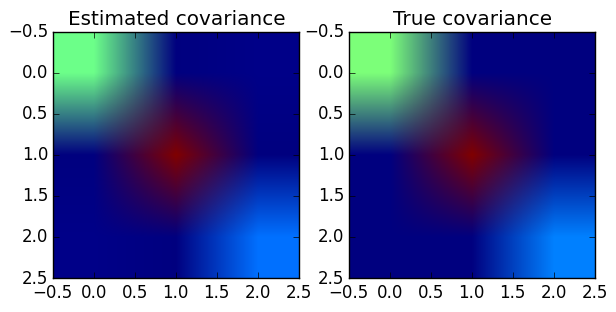

In [66]:
eCov = cov(X)
fig = figure(figsize=(7,7))
subplot(121)
imshow(eCov)
title("Estimated covariance")
subplot(122)
imshow(Sigma)
title("True covariance")
# colorbar();

# Full covariance matrix

In [69]:
n = 10000
p = 3
Theta =[1 .4 .1; .4 1 -.3; .1 -.3 2]
Sigma = inv(Theta)

numEdges = int(p * (p-1) / 2)
edges = zeros(Int64, numEdges, 2)
@show edges[:, 1], edges[:, 2] = ind2sub((3,3), find(triu(Theta,1))) 
beta_edge = Array(Float64, numEdges, 1)
beta_edge[:,1] = [Theta[1,2] Theta[1,3] Theta[2,3]]

gibbs_groups = [1:p]
beta_node = zeros(Float64, p, 1);
beta_node[:, 1] = diag(Theta);

(edges[:,1],edges[:,2]) = ind2sub((3,3),find(triu(Theta,1))) => ([1,1,2],[2,3,3])


In [70]:
X = zeros(Float64, n, p)
graph_sample!(X, n, edges, gibbs_groups,
              phi_node, phi_edge, mh_sampler, mh_ratio,
              beta_node, beta_edge)

(2018605,981395)

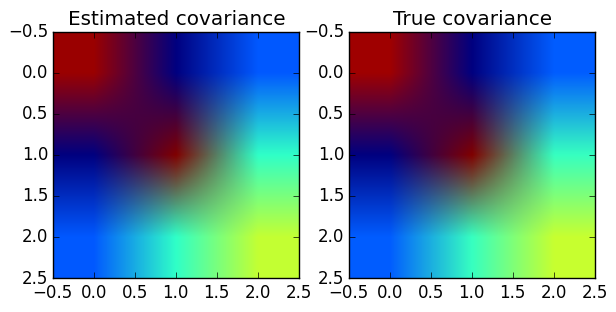

In [71]:
eCov = cov(X)
fig = figure(figsize=(7,7))
subplot(121)
imshow(eCov)
title("Estimated covariance")
subplot(122)
imshow(Sigma)
title("True covariance")
# colorbar();

In [72]:
inv(eCov), Theta

(
3x3 Array{Float64,2}:
 1.00161    0.401506   0.130374
 0.401506   0.991637  -0.262946
 0.130374  -0.262946   2.01201 ,

3x3 Array{Float64,2}:
 1.0   0.4   0.1
 0.4   1.0  -0.3
 0.1  -0.3   2.0)